Initial setup and first topic model run

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import wosis
import pandas as pd
import metaknowledge as mk
import wosis.analysis.plotting as wos_plot

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
RC = mk.RecordCollection("tmp/rest_requested_corpora.txt")
corpora_df = wosis.rec_to_df(RC)

In [4]:
hide_columns = ['DE', 'abstract', 'keywords', 'DOI', 'id', 'kws']

In [5]:
from wosis.analysis import find_topics
topic_results = find_topics(corpora_df, num_topics=5)

Topic 1: model parameters sensitivity models data analysis parameter flow calibration time
Topic 2: optimization design method shape topology problem sensitivity element structural finite
Topic 3: uncertainty stochastic quantification carlo monte bayesian method uncertainties random polynomial
Topic 4: risk emissions energy assessment environmental exposure production cost health analysis
Topic 5: water soil climate river quality groundwater change management land runoff


In [6]:
# find paper of interest - see if it's still in the corpora
tmp_df = topic_results.corpora_df  
tmp_df.loc[tmp_df.id == 'WOS:000248233200001']

for i in range(topic_results.num_topics):
    topic_id = i + 1
    tmp_topic = topic_results.get_topic_by_id(topic_id)
    print("topic_id", topic_id)
    print(tmp_topic.loc[tmp_topic.id == 'WOS:000248233200001']['id'])

topic_id 1
Series([], Name: id, dtype: object)
topic_id 2
Series([], Name: id, dtype: object)
topic_id 3
1589    WOS:000248233200001
Name: id, dtype: object
topic_id 4
Series([], Name: id, dtype: object)
topic_id 5
Series([], Name: id, dtype: object)


In [7]:
subtopic1 = topic_results.get_topic_by_id(1)
subtopic2 = topic_results.get_topic_by_id(2)
subtopic3 = topic_results.get_topic_by_id(3)

In [8]:
model_param_rc = wosis.extract_recs(subtopic1['id'], RC, name='model_param')
opti_design_rc = wosis.extract_recs(subtopic2['id'], RC, name='opti_design')
uncert_rc = wosis.extract_recs(subtopic3['id'], RC, name='uncert')

In [9]:
from functools import reduce

In [10]:
topics_combined = reduce(lambda x, y: x + y, [model_param_rc, opti_design_rc, uncert_rc])

In [11]:
topics_combined_df = wosis.rc_to_df(topics_combined)
topics_combined_df.to_csv('../data/topics_combined.csv')

In [12]:
topics_combined_results = find_topics(topics_combined_df, num_topics=5)

Topic 1: model sensitivity parameters analysis data flow models parameter soil results
Topic 2: optimization design shape topology method sensitivity structural problem analysis element
Topic 3: uncertainty bayesian uncertainties carlo monte model quantification models analysis data
Topic 4: stochastic random method polynomial chaos quantification expansion equations collocation solution
Topic 5: neural network ann artificial networks fuzzy prediction algorithm models regression


In [13]:
combined_subtopic1 = topics_combined_results.get_topic_by_id(1)
combined_subtopic2 = topics_combined_results.get_topic_by_id(2)
combined_subtopic3 = topics_combined_results.get_topic_by_id(3)
combined_subtopic4 = topics_combined_results.get_topic_by_id(4)

In [14]:
model_sens_rc = wosis.extract_recs(combined_subtopic1['id'], RC, name='model_sens')
opti_design2_rc = wosis.extract_recs(combined_subtopic2['id'], RC, name='opti_design2')
uncert_bay_rc = wosis.extract_recs(combined_subtopic3['id'], RC, name='uncert_bay')
stoch_rc = wosis.extract_recs(combined_subtopic4['id'], RC, name='stoch')

In [15]:
subtopics_combined = reduce(lambda x, y: x + y, [model_sens_rc, opti_design2_rc, uncert_bay_rc, stoch_rc])

In [16]:
subtopics_combined_df = wosis.rc_to_df(subtopics_combined)
subtopics_combined_df.to_csv('../data/subtopics_combined.csv')

In [17]:
subtopics_combined_results = find_topics(subtopics_combined_df, num_topics=5)

Topic 1: model sensitivity parameters analysis data models parameter calibration based soil
Topic 2: optimization design shape topology method sensitivity structural problem analysis element
Topic 3: uncertainty bayesian uncertainties carlo monte quantification analysis models assessment probabilistic
Topic 4: stochastic random polynomial method chaos quantification expansion equations problems collocation
Topic 5: flow transport aquifer sediment groundwater hydraulic field rate velocity concentration


In [18]:
combined_subsubtopic1 = subtopics_combined_results.get_topic_by_id(1)
combined_subsubtopic2 = subtopics_combined_results.get_topic_by_id(2)
combined_subsubtopic3 = subtopics_combined_results.get_topic_by_id(3)
combined_subsubtopic4 = subtopics_combined_results.get_topic_by_id(4)

In [19]:
model_sens2_rc = wosis.extract_recs(combined_subsubtopic1['id'], RC, name='model_sens2')
opti_design3_rc = wosis.extract_recs(combined_subsubtopic2['id'], RC, name='opti_design3')
uncert_bay2_rc = wosis.extract_recs(combined_subsubtopic3['id'], RC, name='uncert_bay2')
stoch2_rc = wosis.extract_recs(combined_subsubtopic4['id'], RC, name='stoch2')

In [20]:
subsubtopics_combined = reduce(lambda x, y: x + y, [model_sens2_rc, opti_design3_rc, uncert_bay2_rc, stoch2_rc])

In [21]:
subsubtopics_combined_df = wosis.rc_to_df(subsubtopics_combined)
subsubtopics_combined_df.to_csv('../data/subsubtopics_combined.csv')

In [22]:
subsubtopics_combined_results = find_topics(subsubtopics_combined_df, num_topics=5)

Topic 1: model sensitivity parameters analysis data models parameter results based soil
Topic 2: optimization design shape topology method sensitivity structural element problem analysis
Topic 3: stochastic random polynomial method chaos quantification expansion equations collocation solution
Topic 4: uncertainty bayesian uncertainties carlo monte quantification analysis models assessment probabilistic
Topic 5: rainfall flood runoff hydrological catchment model calibration watershed distributed catchments


<hr>

Plotting subtopic trends over time. <br>
Two topics are chosen, papers focusing on applications of SA and papers focusing on theoretical development of SA. <br>
The next task is to superimpose the category trends over time. <br>
Journal publication trends and top cited papers to indicate which fields are applying or interested in the theory of UA/SA. <br>
Author citation networks to indicate which fields are collaborating, and journal networks.

In [23]:
wos_config = wosis.load_config('config.yml')

In [24]:
SA_rc = wosis.extract_recs(combined_subsubtopic1['id'], RC, name='SA')
optimization_rc = wosis.extract_recs(combined_subsubtopic2['id'], RC, name='optimization')

In [25]:
UA_rc = reduce(lambda x, y: x + y, [uncert_bay2_rc, stoch2_rc])

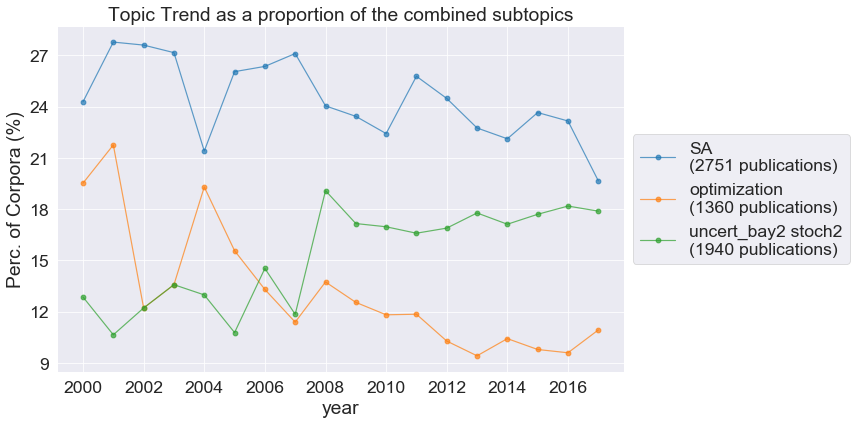

In [61]:
wos_plot.plot_topic_trend([SA_rc, optimization_rc, UA_rc], total_rc=RC, title='Topic Trend as a proportion of the combined subtopics', save_plot_fn='figs/Topic Trend Percentage')

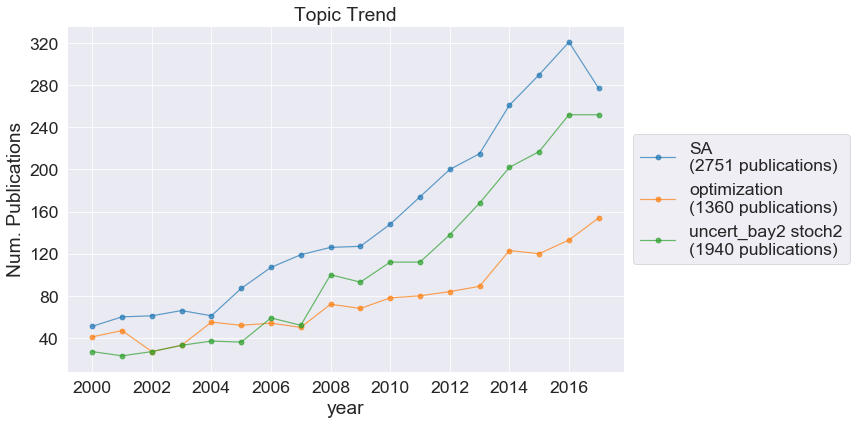

In [27]:
wos_plot.plot_topic_trend([SA_rc, optimization_rc, UA_rc], title='Topic Trend', save_plot_fn='figs/Topic Trend')

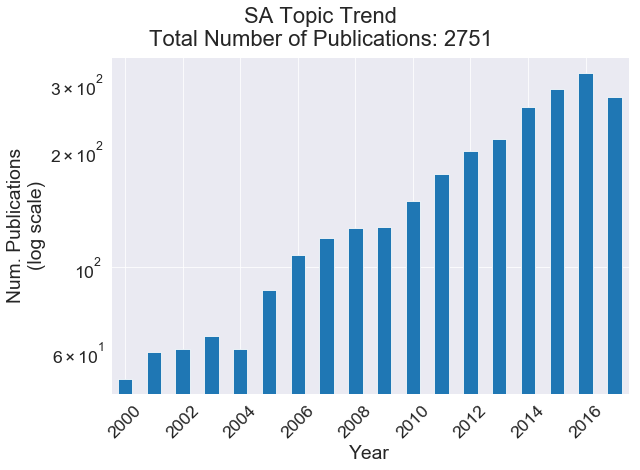

In [28]:
wos_plot.plot_pub_trend(SA_rc, title='SA Topic Trend', save_plot_fn='figs/sa_trend_2000-2016.png')

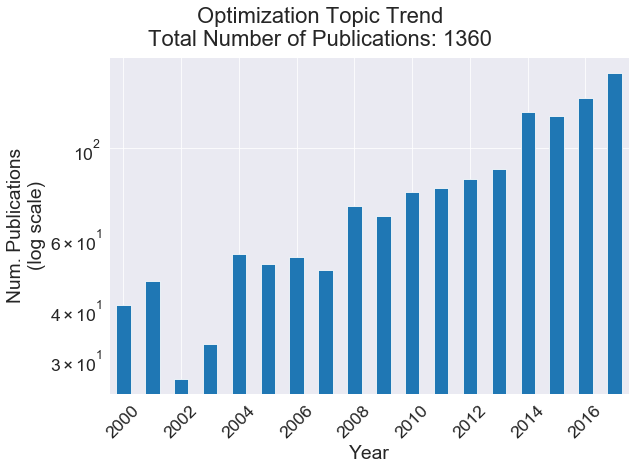

In [29]:
wos_plot.plot_pub_trend(optimization_rc, title='Optimization Topic Trend', save_plot_fn='figs/opti_trend_2000-2016.png')

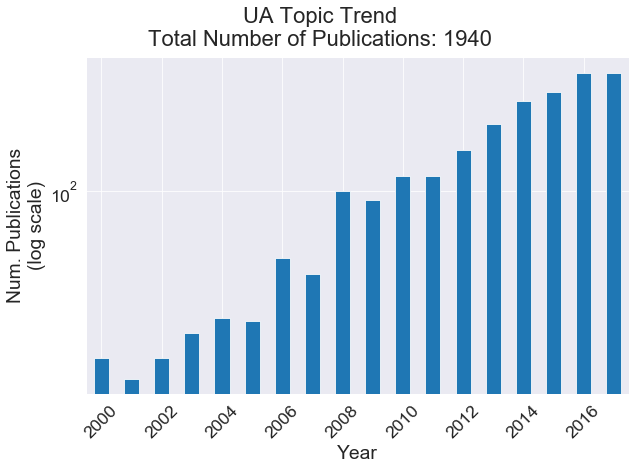

In [30]:
wos_plot.plot_pub_trend(UA_rc, title='UA Topic Trend', save_plot_fn='figs/ua_trend_2000-2016.png')

<hr>
Keyword matching the subtopics

In [31]:
ua_sa_papers = reduce(lambda x, y: x + y, [SA_rc, optimization_rc, UA_rc])

In [32]:
wosis.rc_to_df(ua_sa_papers).to_csv('../data/ua_sa_papers.csv')

1. Frameworks and guidelines for UA/SA

In [33]:
framework = wosis.keyword_matches(ua_sa_papers, ['framework', 'guideline', 'comparison', 'evalua', 'review', 'critici', 'overview', 'diagnostic'], threshold=95.0)

In [34]:
all_framework = framework.combine_recs()

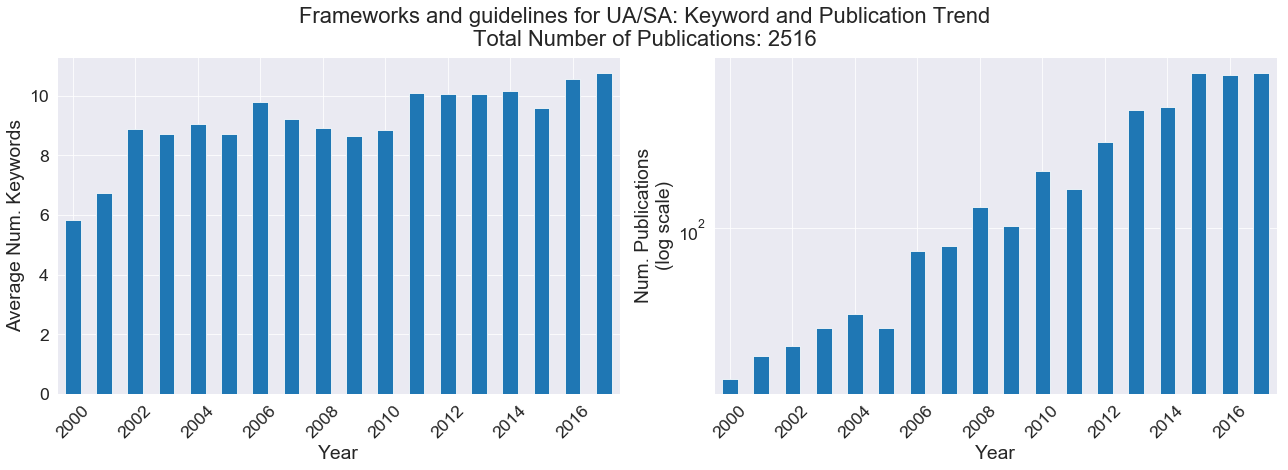

In [35]:
wos_plot.plot_kw_trend(all_framework, title='Frameworks and guidelines for UA/SA: Keyword and Publication Trend', save_plot_fn='figs/framework_pub_trend.png')

Removing Framework papers from the 'new collection'

In [36]:
wo_framework = mk.RecordCollection(name='without_frameworks')
for record in ua_sa_papers:
    if not all_framework.containsID(record.id):
        wo_framework.add(record)

2. Applications of UA/SA

In [37]:
applications = wosis.keyword_matches(wo_framework, ['appl', 'watershed', 'quantify', 'perform', 'calculate', 'in this study', 'catchment'], threshold=95.0)

In [38]:
all_applications = applications.combine_recs()

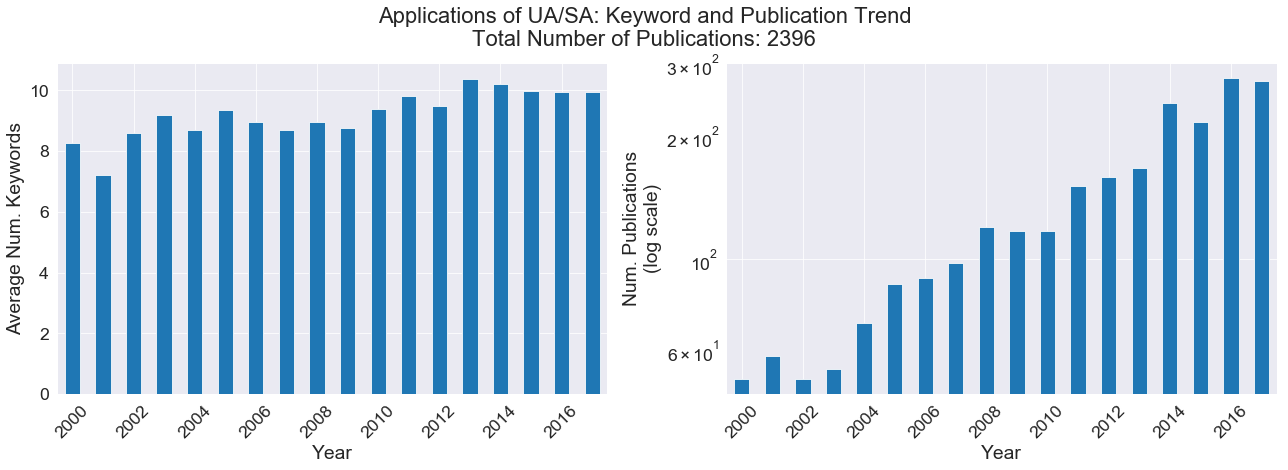

In [39]:
wos_plot.plot_kw_trend(all_applications, title='Applications of UA/SA: Keyword and Publication Trend', save_plot_fn='figs/app_pub_trend.png')

Trends

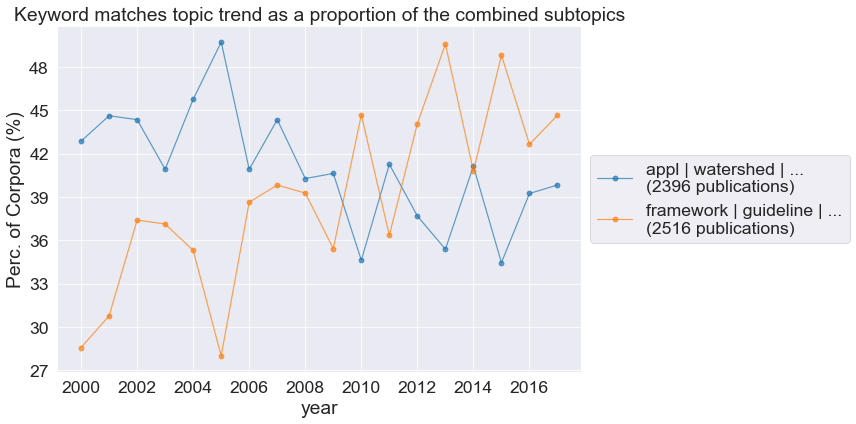

In [40]:
wos_plot.plot_topic_trend([applications, framework], total_rc=ua_sa_papers, title='Keyword matches topic trend as a proportion of the combined subtopics', save_plot_fn='figs/combined_topics_keyword_trend_percentage.png')

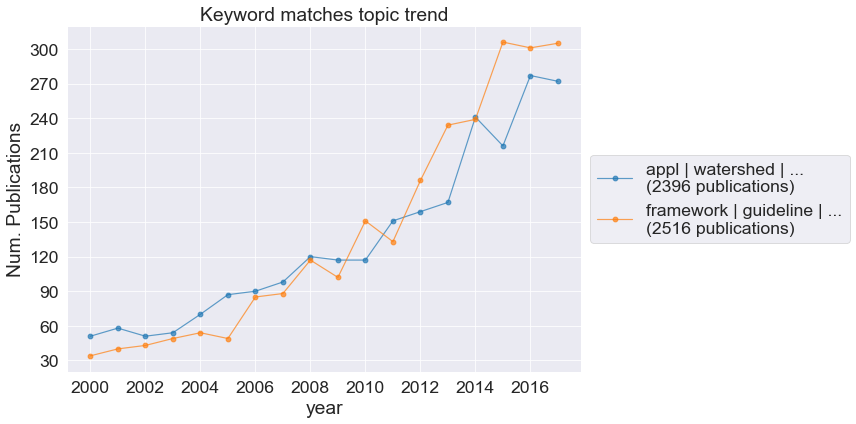

In [41]:
wos_plot.plot_topic_trend([applications, framework], title='Keyword matches topic trend', save_plot_fn='figs/combined_topics_keyword_trend.png')

Top cited journals
<br> 1. Framework

In [42]:
wos_config = wosis.load_config('config.yml')

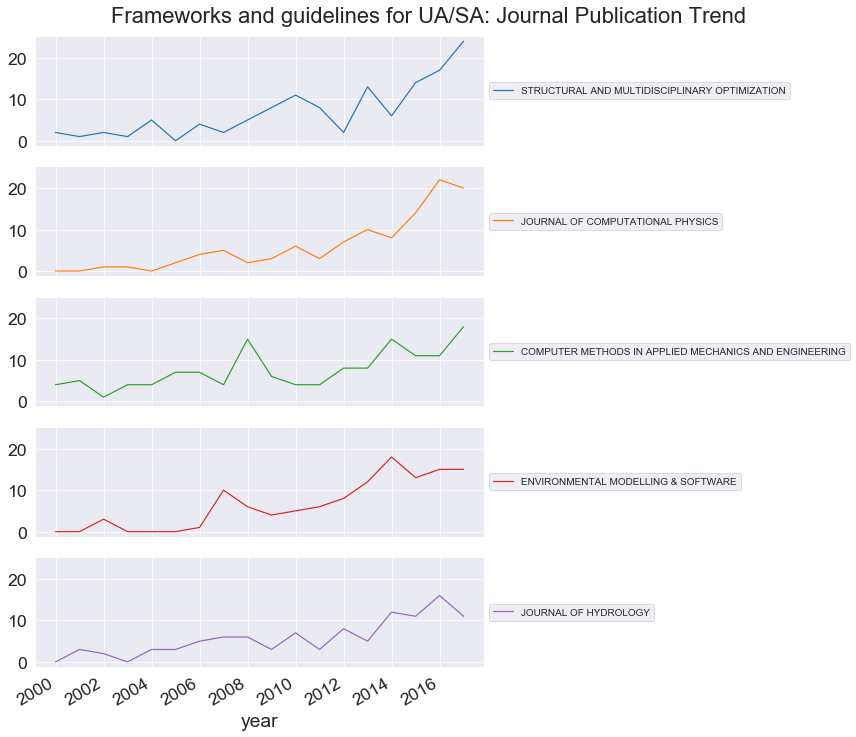

In [43]:
wos_plot.plot_journal_pub_trend(all_framework, top_n=5, save_plot_fn='figs/framework_journal_pub_trend.png', title='Frameworks and guidelines for UA/SA: Journal Publication Trend')

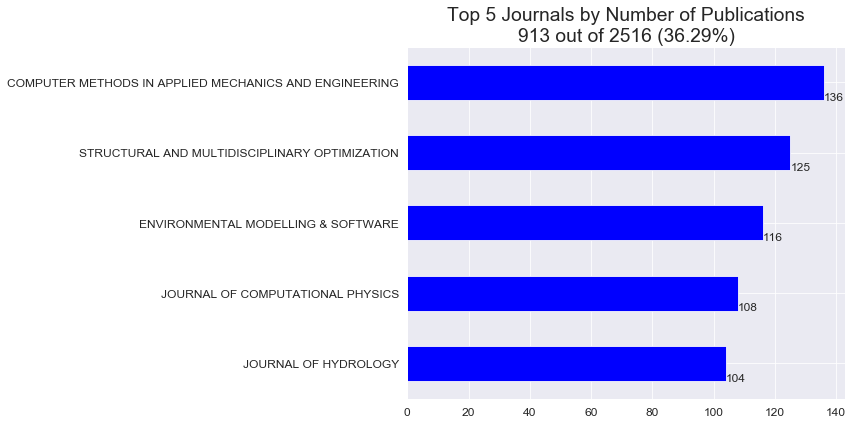

In [44]:
wos_plot.plot_pubs_per_journal(all_framework, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/framework_journal_pubs.png')

In [45]:
journals_of_interest_framework = ['Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper(), 'Journal of Computational Physics'.upper(), 'Structural and Multidisciplinary Optimization'.upper(), 'Computer Methods in Applied Mechanics and Engineering'.upper()]
pubs_for_journals_framework = wosis.find_pubs_by_journal(all_framework, journals_of_interest_framework)

In [46]:
data_dir = "tmp"  # Using the temporary data directory 
                    #- should this be a different tmp?

# Get citations for each paper
paper_citations_per_journal_framework = {}
for pubs in pubs_for_journals_framework:
    paper_citations_per_journal_framework[pubs] = wosis.get_num_citations(pubs_for_journals_framework[pubs], wos_config, 
                                                                    cache_dir=data_dir)

In [47]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_framework = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_framework.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_framework = collection_framework.append(df[cols_of_interest][0:10], ignore_index=True)

In [48]:
top_cited_in_top_journals_framework = collection_framework.sort_values('citations', ascending=False)
top_cited_in_top_journals_framework.head(10)

,AU,year,title,journal,citations,DOI link
0,"Bennett, ND|Croke, BFW|Guariso, G|Guillaume, J...",2013,Characterising performance of environmental mo...,ENVIRONMENTAL MODELLING & SOFTWARE,581,https://dx.doi.org/10.1016/j.envsoft.2012.09.011
1,"Campolongo, F|Cariboni, J|Saltelli, A",2007,An effective screening design for sensitivity ...,ENVIRONMENTAL MODELLING & SOFTWARE,578,https://dx.doi.org/10.1016/j.envsoft.2006.10.004
40,"Abbaspour, KC|Yang, J|Maximov, I|Siber, R|Bogn...",2007,Modelling hydrology and water quality in the p...,JOURNAL OF HYDROLOGY,560,https://dx.doi.org/10.1016/j.jhydrol.2006.09.014
41,"van Griensven, A|Meixner, T|Grunwald, S|Bishop...",2006,A global sensitivity analysis tool for the par...,JOURNAL OF HYDROLOGY,555,https://dx.doi.org/10.1016/j.jhydrol.2005.09.008
2,"Refsgaard, JC|van der Sluijs, JP|Hojberg, AL|V...",2007,Uncertainty in the environmental modelling pro...,ENVIRONMENTAL MODELLING & SOFTWARE,510,https://dx.doi.org/10.1016/j.envsoft.2007.02.004
3,"Merritt, WS|Letcher, RA|Jakeman, AJ",2003,A review of erosion and sediment transport models,ENVIRONMENTAL MODELLING & SOFTWARE,407,https://dx.doi.org/10.1016/S1364-8152(03)00078-1
20,"Sigmund, O|Maute, K",2013,Topology optimization approaches A comparative...,STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION,382,https://dx.doi.org/10.1007/s00158-013-0978-6
4,"Saltelli, A|Annoni, P",2010,How to avoid a perfunctory sensitivity analysis,ENVIRONMENTAL MODELLING & SOFTWARE,355,https://dx.doi.org/10.1016/j.envsoft.2010.04.012
42,"Oudin, L|Hervieu, F|Michel, C|Perrin, C|Andrea...",2005,Which potential evapotranspiration input for a...,JOURNAL OF HYDROLOGY,321,https://dx.doi.org/10.1016/j.jhydrol.2004.08.026
43,"Yang, J|Reichert, P|Abbaspour, KC|Xia, J|Yang, H",2008,Comparing uncertainty analysis techniques for ...,JOURNAL OF HYDROLOGY,312,https://dx.doi.org/10.1016/j.jhydrol.2008.05.012


In [49]:
top_cited_in_top_journals_framework.to_csv('../data/top_cited_in_top_journals_framework.csv', index=False)

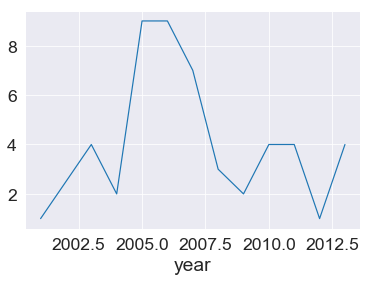

In [50]:
top_cited_in_top_journals_framework.groupby('year').count()['AU'].plot()

2. Applications

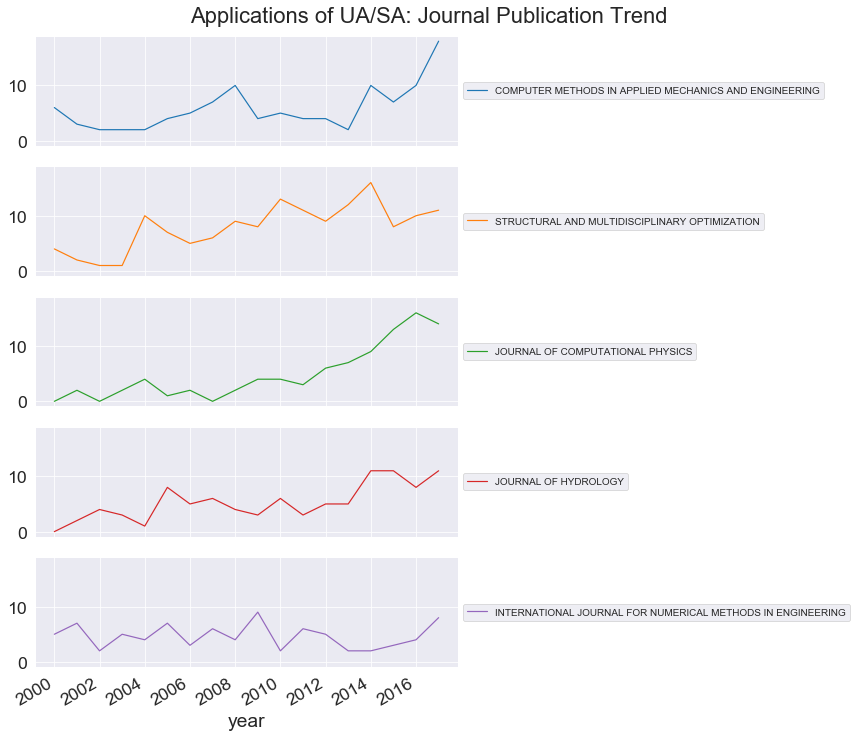

In [51]:
wos_plot.plot_journal_pub_trend(all_applications, top_n=5, save_plot_fn='figs/applications_journal_pub_trend.png', title='Applications of UA/SA: Journal Publication Trend')

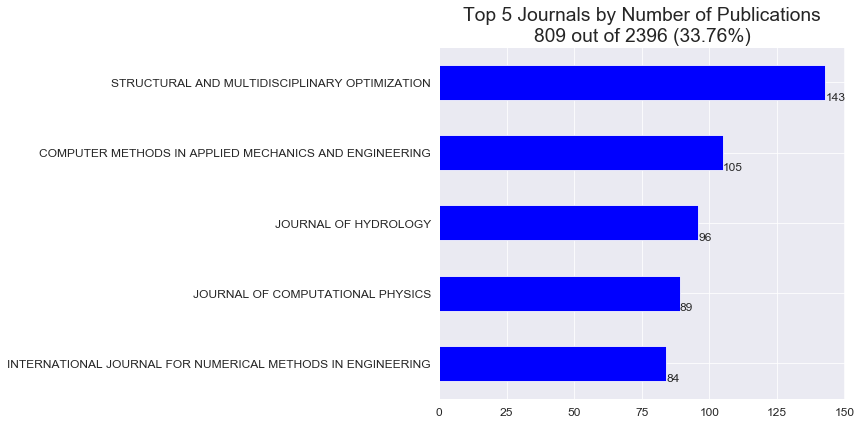

In [52]:
wos_plot.plot_pubs_per_journal(all_applications, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/app_journal_pubs.png')

In [53]:
journals_of_interest_app = ['Structural and Multidisciplinary Optimization'.upper(), 'Journal of Hydrology'.upper(), 'Computer Methods in Applied Mechanics and Engineering'.upper(), 'Journal of Computational Physics'.upper(), 'International Journal for Numerical Methods in Engineering'.upper()]
pubs_for_journals_app = wosis.find_pubs_by_journal(all_applications, journals_of_interest_app)

In [54]:
data_dir = "tmp"  # Using the temporary data directory

paper_citations_per_journal_app = {}
for pubs in pubs_for_journals_app:
    paper_citations_per_journal_app[pubs] = wosis.get_num_citations(pubs_for_journals_app[pubs], wos_config, 
                                                                    cache_dir=data_dir)

In [55]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_app = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_app.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_app = collection_app.append(df[cols_of_interest][0:10], ignore_index=True)

In [56]:
top_cited_in_top_journals_app = collection_app.sort_values('citations', ascending=False)
top_cited_in_top_journals_app.head(10)

,AU,year,title,journal,citations,DOI link
20,"Abbaspour, KC|Yang, J|Maximov, I|Siber, R|Bogn...",2007,Modelling hydrology and water quality in the p...,JOURNAL OF HYDROLOGY,560,https://dx.doi.org/10.1016/j.jhydrol.2006.09.014
21,"van Griensven, A|Meixner, T|Grunwald, S|Bishop...",2006,A global sensitivity analysis tool for the par...,JOURNAL OF HYDROLOGY,555,https://dx.doi.org/10.1016/j.jhydrol.2005.09.008
0,"Sigmund, O|Maute, K",2013,Topology optimization approaches A comparative...,STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION,382,https://dx.doi.org/10.1007/s00158-013-0978-6
22,"Oudin, L|Hervieu, F|Michel, C|Perrin, C|Andrea...",2005,Which potential evapotranspiration input for a...,JOURNAL OF HYDROLOGY,321,https://dx.doi.org/10.1016/j.jhydrol.2004.08.026
23,"Yang, J|Reichert, P|Abbaspour, KC|Xia, J|Yang, H",2008,Comparing uncertainty analysis techniques for ...,JOURNAL OF HYDROLOGY,312,https://dx.doi.org/10.1016/j.jhydrol.2008.05.012
24,"Xu, CY|Gong, LB|Jiang, T|Chen, DL|Singh, VP",2006,Analysis of spatial distribution and temporal ...,JOURNAL OF HYDROLOGY,305,https://dx.doi.org/10.1016/j.jhydrol.2005.11.029
25,"Duan, Q|Schaake, J|Andreassian, V|Franks, S|Go...",2006,Model Parameter Estimation Experiment (MOPEX):...,JOURNAL OF HYDROLOGY,289,https://dx.doi.org/10.1016/j.jhydrol.2005.07.031
26,"Muleta, MK|Nicklow, JW",2005,Sensitivity and uncertainty analysis coupled w...,JOURNAL OF HYDROLOGY,259,https://dx.doi.org/10.1016/j.jhydrol.2004.09.005
30,"Blatman, G|Sudret, B",2011,Adaptive sparse polynomial chaos expansion bas...,JOURNAL OF COMPUTATIONAL PHYSICS,251,https://dx.doi.org/10.1016/j.jcp.2010.12.021
10,"Moens, D|Vandepitte, D",2005,A survey of non-probabilistic uncertainty trea...,COMPUTER METHODS IN APPLIED MECHANICS AND ENGI...,237,https://dx.doi.org/10.1016/j.cma.2004.03.019


In [57]:
top_cited_in_top_journals_app.to_csv('../data/top_cited_in_top_journals_app.csv', index=False)

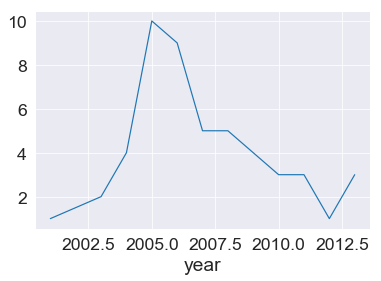

In [58]:
top_cited_in_top_journals_app.groupby('year').count()['AU'].plot()

In [60]:
top_cited_in_top_journals_app.loc[top_cited_in_top_journals_app['year'] == 2005, 'title'].tolist()

['Which potential evapotranspiration input for a lumped rainfall-runoff model? Part 2 - Towards a simple and efficient potential evapotranspiration model for rainfall-runoff modelling',
 'Sensitivity and uncertainty analysis coupled with automatic calibration for a distributed watershed model',
 'A survey of non-probabilistic uncertainty treatment in finite element analysis',
 'Solving elliptic boundary value problems with uncertain coefficients by the finite element method: the stochastic formulation',
 'Discrete material optimization of general composite shell structures',
 'Topology optimization of channel flow problems',
 'Adjoint sensitivity analysis of regional air quality models',
 'Review of options for structural design sensitivity analysis. Part 1: Linear systems',
 'Multi-objective robust optimization using a sensitivity region concept',
 'A level-set method for vibration and multiple loads structural optimization']